In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

from keras.datasets import boston_housing

Using TensorFlow backend.


In [36]:
pd.DataFrame(boston_housing.load_data())

,0,1
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,...","[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."
1,"[[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0...","[7.2, 18.8, 19.0, 27.0, 22.2, 24.5, 31.2, 22.9..."


In [37]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [39]:
len(x_train), len(x_test)

(404, 102)

In [119]:
#pd.DataFrame(x_train), 
pd.DataFrame(y_train)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [90]:
x4 = pd.DataFrame(x_train)[5]
y = y_train

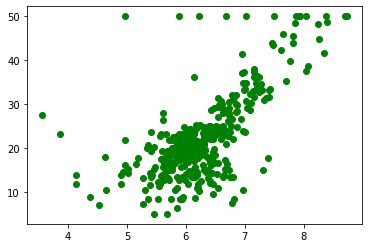

In [91]:
plt.plot(x4, y, 'o', color='green')

In [108]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns

In [96]:
from sklearn.datasets import make_regression

model = sm.OLS(pd.DataFrame(y), pd.DataFrame(x4))
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              3594.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                   6.98e-203
Time:                        21:40:39   Log-Likelihood:                         -1397.3
No. Observations:                 404   AIC:                                      2797.
Df Residuals:                     403   BIC:                                      2801.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

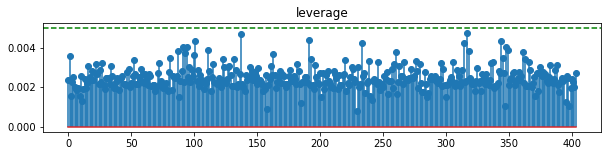

In [128]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat, use_line_collection=True)
plt.axhline(0.005, c="g", ls="--")
plt.title("leverage")
plt.show()

In [69]:
hat.sum()

0.9999999999999998

from statsmodels.graphics.regressionplots import abline_plot

ax = plt.subplot()
plt.scatter(x4, y)
#mod = sm.OLS(y,x4).fit()
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(x4[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("ols regression and leverage")
plt.show()

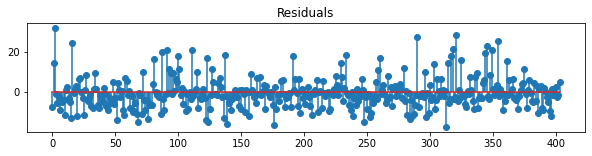

In [130]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid , use_line_collection=True)
plt.title("Residuals")
plt.show()
